# Boston house prices prediction

Version 2: train on the train set and evaluate model performance on test set

#### Install additional packages
pip install mglearn

### 1. The Boston data set:
 <p>The data set contains house price in the area of Boston. It is colllected by the U.S Census Service and then obtained by the StatLib archive. 
 </p>
 <p><img src="https://www.pexels.com/it-it/foto/case-montagna-esterno-facciata-7746904/" alt="Boston house price"></p>
<p>Overview of the Boston data is shown as follows:</p>

- Data samples/ points: 506
- Dimensionality: 13
- Features: 12 features/predictors, real and positive value
- Targets (MEDV): house price, real value

### 2. List of predictors:
<ul>
<li>CRIM     per capita crime rate by town</li>
<li>ZN       proportion of residential land zoned for lots over 25,000 sq.ft.</li>
<li>INDUS    proportion of non-retail business acres per town</li>
<li>CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</li>
<li>NOX      nitric oxides concentration (parts per 10 million)</li>
<li>RM       average number of rooms per dwelling</li>
<li>AGE      proportion of owner-occupied units built prior to 1940</li>
<li>DIS      weighted distances to five Boston employment centres</li>
<li>RAD      index of accessibility to radial highways</li>
<li>TAX      full-value property-tax rate per $10,000$ </li>
<li>PTRATIO  pupil-teacher ratio by town </li>
<li>B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
<li>LSTAT    % lower status of the population</li>
<li>MEDV     Median value of owner-occupied homes in $1000's</li>
</ul>

### 0. Import the required libraries

In [ ]:
import numpy as np
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

### 1. Load dataset

#### Method 1: Load data from scikit-learn 
Scikit-learn contains several data sets that do not require to download from  external websites. 

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

: 

In [4]:
# view dataset characteristics
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
print("boston_dataset.data.shape: {}".format(boston_dataset.data.shape)) 
print("Number of samples: {}".format(len(boston_dataset.target)))
print("Features: {}" .format(boston_dataset.feature_names))

boston_dataset.data.shape: (506, 13)
Number of samples: 506
Features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
#boston_dataset.DESCR


## Linear regresssion

Load the dataset into dataframe 

In [7]:
# save features
X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# save target
y = pd.DataFrame(boston_dataset.target) # df [, 1]

In [8]:
X.shape, y.shape

((506, 13), (506, 1))

In [9]:
columns = boston_dataset.feature_names.tolist() + ['MEDV']

df = pd.DataFrame(np.hstack([X,y]), columns=columns)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
# concat X and y horizontally
columns = boston_dataset.feature_names.tolist() + ['target']
df = pd.DataFrame(np.hstack([X,y]), columns=columns)

In [11]:
df.shape

(506, 14)

In [12]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [13]:
df[['RM','target']].head(10), df[['RM','target']].tail(10)

(      RM  target
 0  6.575    24.0
 1  6.421    21.6
 2  7.185    34.7
 3  6.998    33.4
 4  7.147    36.2
 5  6.430    28.7
 6  6.012    22.9
 7  6.172    27.1
 8  5.631    16.5
 9  6.004    18.9,
         RM  target
 496  5.390    19.7
 497  5.794    18.3
 498  6.019    21.2
 499  5.569    17.5
 500  6.027    16.8
 501  6.593    22.4
 502  6.120    20.6
 503  6.976    23.9
 504  6.794    22.0
 505  6.030    11.9)

### 2. Exploratory Data Analysis (EDA)
<p>It is important to explore and have some visulisation on the underlying data before training the model</p>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### Check for missing value
df.isnull().sum() 

- One way to fill missing data
#df["target"].fillna(df["target"].median(), inplace=True)


In [15]:
df.shape

(506, 14)

In [16]:
# check for missing value
#df.isnull().sum() 
df.isnull().sum() / df.shape[0] * 100 # percentage of missing value for each feature



CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
target     0.0
dtype: float64

*Remark: Boston data set does not have any missing value.*

#### Check for duplicate
df.duplicated().sum()

df.drop_duplicates(inplace=True)


In [17]:
df.duplicated().sum()


0

In [18]:
# Print summary statistics
print(df.describe())
print("\n")

# Print DataFrame information
print(df.info())
print("\n")

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

<p> Distribution of the target var </p>

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

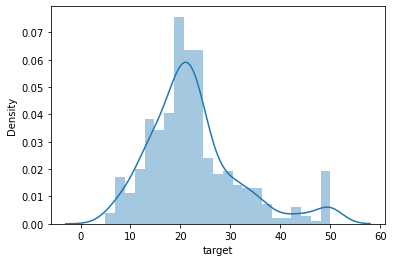

In [19]:
sns.distplot(df['target'])

*Remarks: the target is normaly distributed with a few outliers*

<p>Measure the relationship among pairs of variables</p>

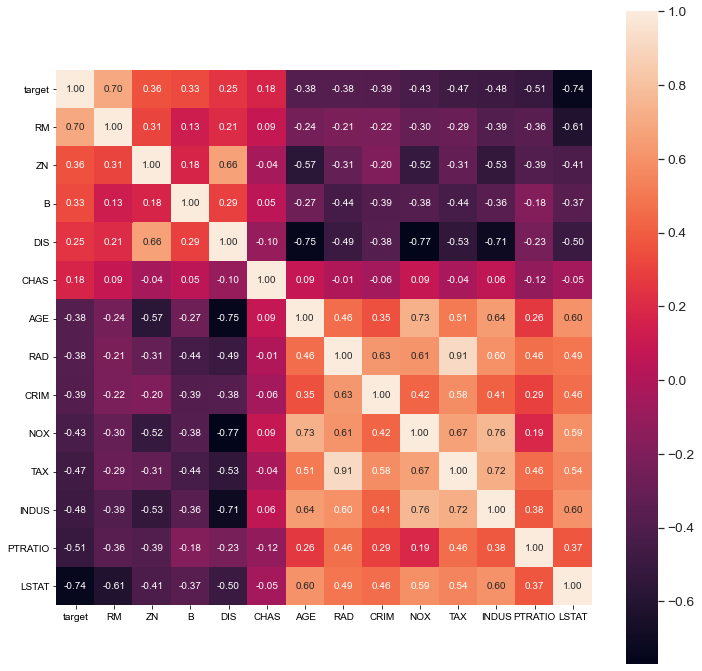

In [20]:
# correlation matrix 
corrmat = df.corr()
k=df.shape[1] #number of features and target
plt.subplots(figsize=(12, 12))
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(df[cols].values.T)

sns.set(font_scale=1.25)

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


*Remarks: The correlation matrix display numeric value from -1 to 1. If the value is close to -1, two variables have a strong negative correlation. If the value is close to +1, two variables have a storng positive correlation. For feature selection, we are interested in features with higher correlation values*

### Using pair plots to visualize possible pairs of features


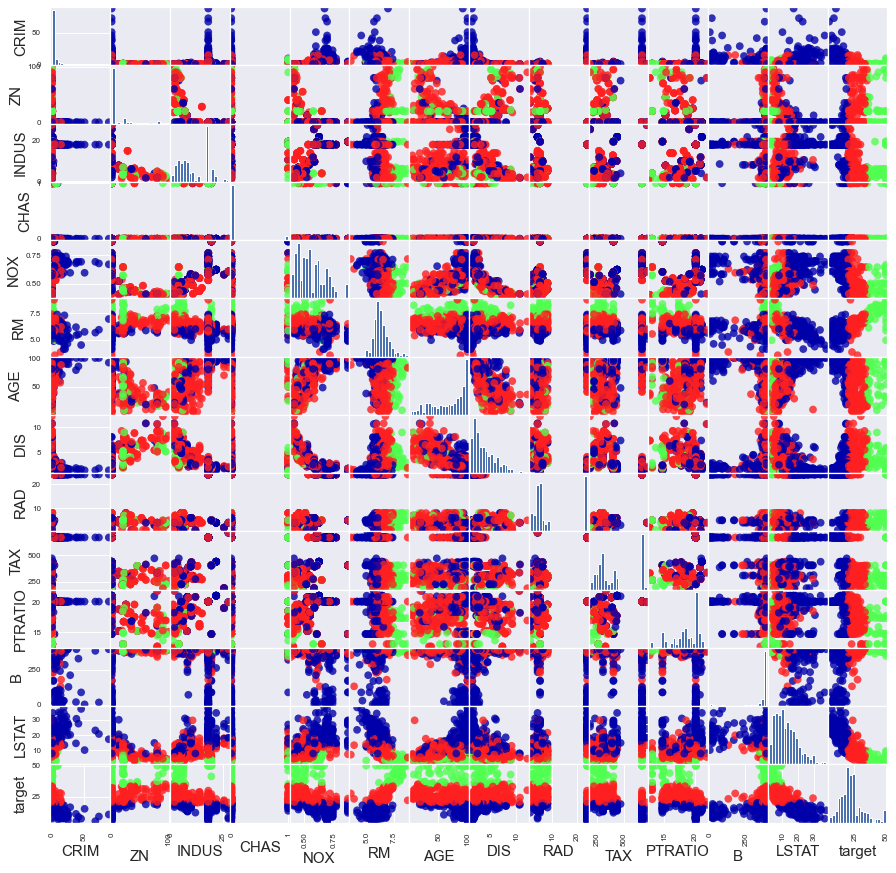

In [27]:
import mglearn
# create a scatter matrix from the dataframe for different pairs of features

pair_plot = pd.plotting.scatter_matrix(df, c=df['target'], figsize=(15, 15), marker='o',
                            hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

## Select a shorted list of features to predict house price
<p> From the correlation matrix, <code> RM </code> has strong impact on the house price. </p>. For the sake of simplicity of this lecture, we build a model to predict house price w.r.t the feature <code>RM</code>.

### 3.1 Model training on raw dataset with one feature

In [21]:
# save our data into file for future use
df[['RM','target']].to_csv('./../../03_datasets/preprocessed/boston_univariate_rm_raw.csv', index=False)

Model coeff w =  [8.46109164]
Intercept when fit_intercept=True : -30.57103


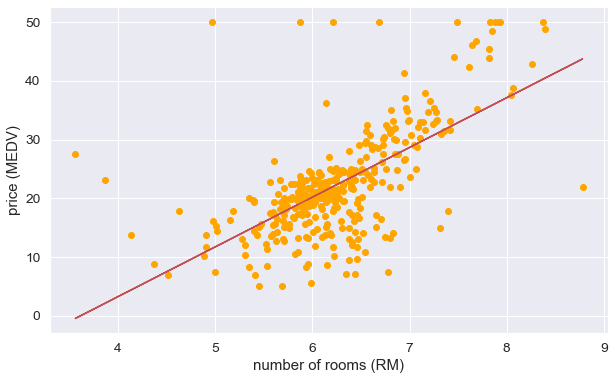

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

df = pd.read_csv('./../../03_datasets/preprocessed/boston_univariate_rm_raw.csv', sep = ',')

X = df['RM']
y = df['target']

# Split data set into 2 parts: train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.3,
                                random_state=1)

# Reshape X bc it has only 1 feature
X_train = X_train.values.reshape(-1,1) 
X_test = X_test.values.reshape(-1,1)

# Train/fit model on the training set
reg_no_preprocess_1_feature = LinearRegression(fit_intercept=True) # True means y-intercept will be                                                                                                                                           by the line of best fit

reg_no_preprocess_1_feature.fit(X_train, y_train)
print('Model coeff w = ', reg_no_preprocess_1_feature.coef_)
print('Intercept when fit_intercept=True : {:.5f}'.format(reg_no_preprocess_1_feature.intercept_))

### Draw a regression line 
y_train_predicted = reg_no_preprocess_1_feature.predict(X_train)

plt.figure(figsize=(10,6))
plt.plot(X_train, y_train, 'bo', color = 'orange')     # observed data
plt.plot(X_train, y_train_predicted, 'r-') # predicted data

plt.xlabel('number of rooms (RM)')
plt.ylabel('price (MEDV)')
plt.show()



In [29]:
# 
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (354, 1)
X_test shape: (152, 1)


#### Evaluate model's performance on test set

In [52]:
### Model evaluation for training set
y_train_predicted = reg_no_preprocess_1_feature.predict(X_train)
rmse_on_train = (np.sqrt(mean_squared_error(y_train, y_train_predicted)))
r2 = r2_score(y_train, y_train_predicted)
print("--------------------------------------")
print("Model performance on 'training' set")
print("--------------------------------------")
print('- Training set RMSE: {:.2f}'.format(rmse_on_train))
print("- Training set score: {:.2f}".format(reg_no_preprocess_1_feature.score(X_train, y_train))) 

### Model evaluation for test set
y_test_predicted = reg_no_preprocess_1_feature.predict(X_test)
rmse_on_test = (np.sqrt(mean_squared_error(y_test, y_test_predicted)))
print("--------------------------------------")
print("Model performance on 'test' set")
print("--------------------------------------")
print("- Test set RMSE: {:.2f}".format(rmse_on_test))
print("- Test set score: {:.2f}".format(reg_no_preprocess_1_feature.score(X_test, y_test)))
print("\n")
print("--------------------------------------")
print("Number of features used: {}".format(np.sum(reg_no_preprocess_1_feature.coef_ != 0)))

--------------------------------------
Model performance on 'training' set
--------------------------------------
- Training set RMSE: 6.85
- Training set score: 0.42
--------------------------------------
Model performance on 'test' set
--------------------------------------
- Test set RMSE: 6.04
- Test set score: 0.60


--------------------------------------
Number of features used: 1


In [53]:
# make prediction for a house whose rooms is 5.5 using predict()
reg_no_preprocess_1_feature.predict(np.array([5.5]).reshape(-1,1))

array([15.96497159])

In [25]:
# make prediction for a house whose rooms is 5.5 using predict()
reg_no_preprocess_1_feature.predict(np.array([5.5]).reshape(-1,1))

array([15.39097862])

In [26]:
reg_no_preprocess_1_feature.intercept_ + reg_no_preprocess_1_feature.coef_[0]*5.5

15.390978620053133

### 3.2 Model training on raw dataset with k features

In [64]:
boston_dataset = load_boston()
# save features
X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# save target
y = pd.DataFrame(boston_dataset.target) # df [, 1]

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

boston_dataset = load_boston()
# save features
X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# save target
y = pd.DataFrame(boston_dataset.target) # df [, 1]

# Split data set into 2 parts: train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=1)

# Reshape X (train, test)) if it has only 1 feature
#X_train = X_train.values.reshape(-1,1) 
#X_test = X_test.values.reshape(-1,1)

# Train/fit model on the training set
reg_no_preprocess_k_feature = LinearRegression(fit_intercept=True) # True means y-intercept will be                                                                                                                                           by the line of best fit

reg_no_preprocess_k_feature.fit(X_train, y_train)
print('Model coeff w = ', reg_no_preprocess_k_feature.coef_)
print('Intercept when fit_intercept=True : ', reg_no_preprocess_k_feature.intercept_)





Model coeff w =  [[-1.12386867e-01  5.80587074e-02  1.83593559e-02  2.12997760e+00
  -1.95811012e+01  3.09546166e+00  4.45265228e-03 -1.50047624e+00
   3.05358969e-01 -1.11230879e-02 -9.89007562e-01  7.32130017e-03
  -5.44644997e-01]]
Intercept when fit_intercept=True :  [42.93352585]


#### Evaluate model's performance of k features on test set 

In [76]:
### Model evaluation for training set
y_train_predicted = reg_no_preprocess_k_feature.predict(X_train)
rmse_on_train = (np.sqrt(mean_squared_error(y_train, y_train_predicted)))
r2 = r2_score(y_train, y_train_predicted)
print("--------------------------------------")
print("Model performance on 'training' set")
print("--------------------------------------")
print('- Training set RMSE: {:.2f}'.format(rmse_on_train))
print("- Training set score: {:.2f}".format(reg_no_preprocess_k_feature.score(X_train, y_train))) 

### Model evaluation for test set
y_test_predicted = reg_no_preprocess_k_feature.predict(X_test)
rmse_on_test = (np.sqrt(mean_squared_error(y_test, y_test_predicted)))
print("--------------------------------------")
print("Model performance on 'test' set")
print("--------------------------------------")
print("- Test set RMSE: {:.2f}".format(rmse_on_test))
print("- Test set score: {:.2f}".format(reg_no_preprocess_k_feature.score(X_test, y_test)))
print("\n")
print("--------------------------------------")
print("Number of features used: {}".format(np.sum(reg_no_preprocess_k_feature.coef_ != 0)))

--------------------------------------
Model performance on 'training' set
--------------------------------------
- Training set RMSE: 4.68
- Training set score: 0.73
--------------------------------------
Model performance on 'test' set
--------------------------------------
- Test set RMSE: 4.84
- Test set score: 0.76


--------------------------------------
Number of features used: 13


### 4. Model training on preprocessed data
#### 4.1  Preprocessing 
<li> Remove outliers 

#### Check outliers
<p> Calculate following statistics: </p>
<li> mean (trung binh)
<li> median (trung vi) (it is known as Q2) </li>
<li> Q1 (median of the lower group from the LEFT of median (exclude median)) </li>
<li> Q3 (median of the lower group from the RIGHT of median (exclude median)) </li>
<li> IBR = Q3 - Q1 </li>
<li> Statistical rule defines: outlier < Q1 - 1.5IQR or outlier > Q3 + 1.5IQR

We use boxplot to identify outliers in the dataset

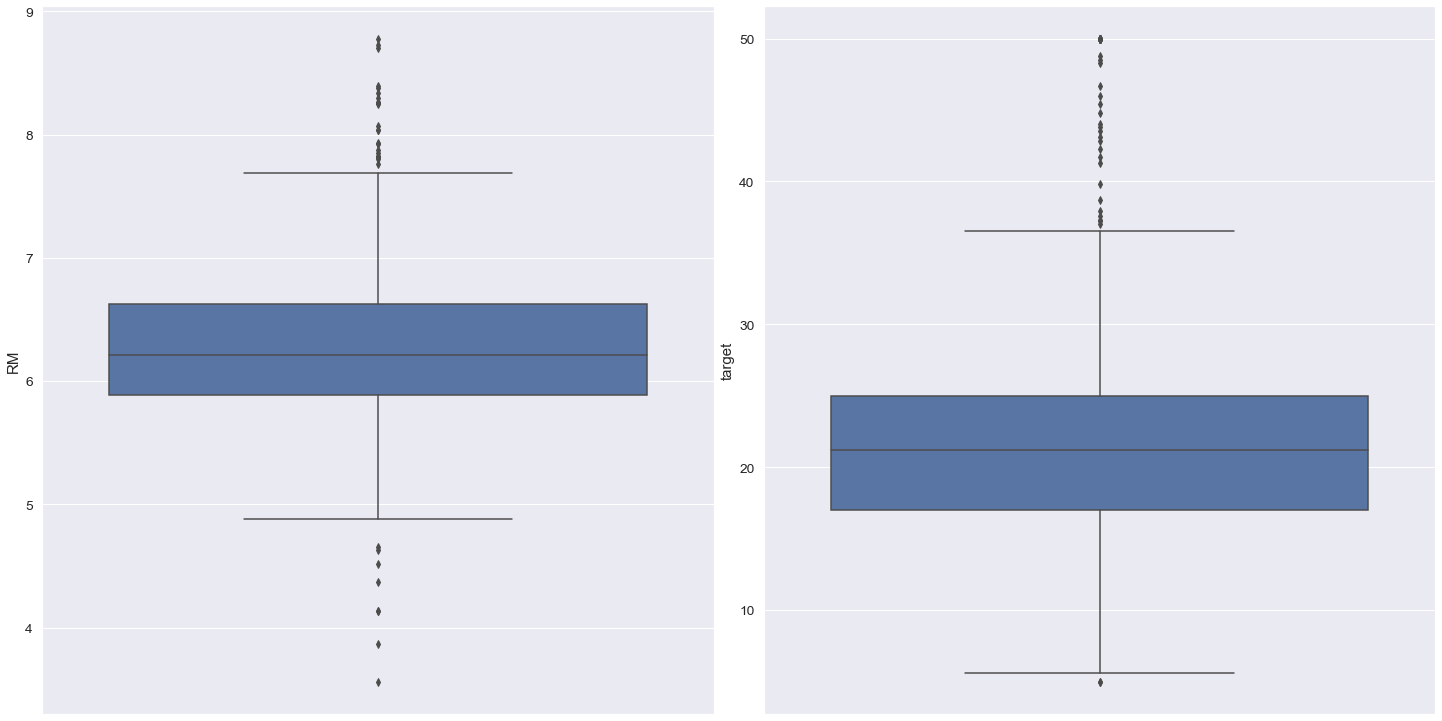

In [27]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### Calculate percentage of outliers for each features

In [28]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column RM outliers = 5.93%
Column target outliers = 7.91%


*Remarks: Features CRIM, ZN, RM, B, LSTAT have many outliers.*

In [29]:
df[['RM','target']]
df

,RM,target
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


Text(0, 0.5, 'Price (MEDV)')

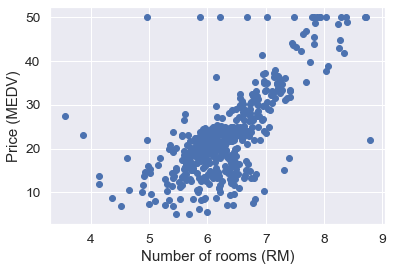

In [30]:
#plt.figure(figsize=(15, 5))
plt.scatter(df['RM'], df['target'], marker='o')
#plt.title('House price prediction using 1 feature')
plt.xlabel('Number of rooms (RM)')
plt.ylabel('Price (MEDV)')

*Remarks: * The number of room (RM) affects the price linearly. We notice that  there are few outliers. 

##### Remove outliers for feature RM

In [31]:
q75, q25 = np.percentile(df['RM'], [75 ,25])
iqr = q75 - q25

rm_lower_bound_outlier = q25 - 1.5*iqr
rm_upper_bound_outlier = q75 + 1.5*iqr

print('Outliers < ', rm_lower_bound_outlier, ' or outliers > ', rm_upper_bound_outlier )

Outliers <  4.778499999999999  or outliers >  7.730500000000001


In [32]:
# How many outliers for feature RM
print(df[df['RM']<rm_lower_bound_outlier].shape[0])
print(df[df['RM']>rm_upper_bound_outlier].shape[0])
print(df.shape)

8
22
(506, 2)


In [33]:
# Removew outliers
df=  df[~(df['RM'] <=rm_lower_bound_outlier)]
df=  df[~(df['RM'] >=rm_upper_bound_outlier)]
print(df.shape[0])

476


Text(0, 0.5, 'price (MEDV)')

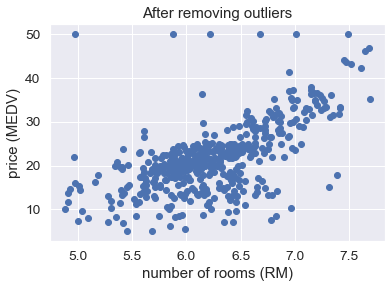

In [34]:
# Plot data after removing outliers
#plt.figure(figsize=(15, 5))
plt.scatter(df['RM'], df['target'], marker='o')
plt.title('After removing outliers')
plt.xlabel('number of rooms (RM)')
plt.ylabel('price (MEDV)')

#### Remove outlier for price

In [35]:
q75, q25 = np.percentile(df['target'], [75 ,25])
iqr = q75 - q25

y_lower_bound_outlier = q25 - 1.5*iqr
y_upper_bound_outlier = q75 + 1.5*iqr

print('Outliers y < ', y_lower_bound_outlier, ' or outliers y > ', y_upper_bound_outlier )

Outliers y <  5.149999999999999  or outliers y >  36.15


In [36]:
print(df[df['target']<y_lower_bound_outlier].shape[0])
print(df[df['target']>y_upper_bound_outlier].shape[0])
print(df.shape)

2
21
(476, 2)


In [37]:
df =  df[~(df['target'] <=y_lower_bound_outlier)]
df =  df[~(df['target'] >=y_upper_bound_outlier)]
print(df.shape[0])

453


Text(0, 0.5, 'price (MEDV)')

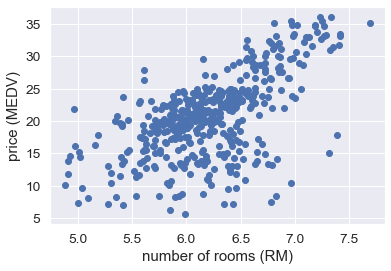

In [38]:
# Plot data after removing outliers
#plt.figure(figsize=(8, 5))
plt.scatter(df['RM'], df['target'], marker='o')
#plt.title('House prediction using 1 feature')
plt.xlabel('number of rooms (RM)')
plt.ylabel('price (MEDV)')

#### Save clean data into .csv file

In [39]:
df[['RM','target']]

,RM,target
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
5,6.430,28.7
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


In [40]:
# save preprocessed data into file for future use
df[['RM','target']].to_csv('./../../03_datasets/preprocessed/boston_univariate_rm_cleaned.csv', index=False)

In [41]:
df = pd.read_csv('./../../03_datasets/preprocessed/boston_univariate_rm_cleaned.csv', sep = ',')
df.head()

,RM,target
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,6.430,28.7


*Remarks: Need to reshape(-1,1) if X has only one feature*

### Fitting model to the train set (after removing outliers)

In [42]:
# training/learning on the scaled training data
from sklearn.linear_model import LinearRegression

df = pd.read_csv('./../../03_datasets/preprocessed/boston_univariate_rm_cleaned.csv', sep = ',')
X = df['RM']
y = df['target']

X_train_preprocessed = X
y_train_preprocessed = y
X_train_preprocessed = X_train_preprocessed.values.reshape(-1,1)

reg_removing_outlier = LinearRegression(fit_intercept=True) # True means y-intercept will be                                                                                                                                           by the line of best fit

reg_removing_outlier.fit(X_train_preprocessed, y_train_preprocessed)
print('Model coeff w = ', reg_removing_outlier.coef_)
print('Intercept when fit_intercept=True : {:.5f}'.format(reg_removing_outlier.intercept_))



Model coeff w =  [7.61451685]
Intercept when fit_intercept=True : -26.54465


In [43]:
reg_removing_outlier.coef_[0], reg_removing_outlier.intercept_

(7.614516852314879, -26.54464604011996)

* Remark: Linear line has the form *
y ~  -26.54 + 7.61 x RM                          

#### Draw a regression line 

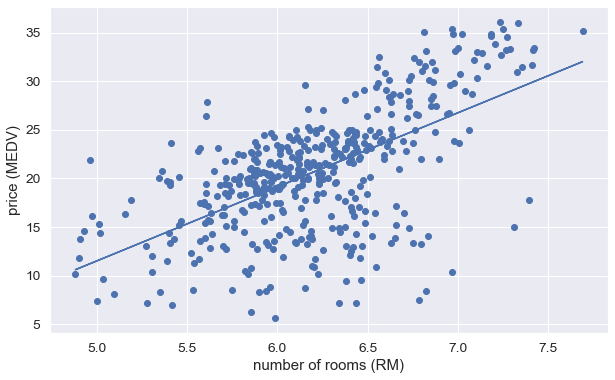

In [44]:
# Draw a regression line 
y_train_predicted = reg_removing_outlier.predict(X_train_preprocessed)

plt.figure(figsize=(10,6))
plt.plot(X_train_preprocessed, y_train_preprocessed, 'bo')     # raw data
plt.plot(X_train_preprocessed, y_train_predicted, 'b-') # predicted data

plt.xlabel('number of rooms (RM)')
plt.ylabel('price (MEDV)')
plt.show()

### Evaluating model performance on raw data and preprocessed data 


In [45]:
# model evaluation for training set (on raw data)
y_train_predicted = reg_no_preprocess.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predicted)))
r2 = r2_score(y_train, y_train_predicted)
print("--------------------------------------")
print("1. Model performance on raw data")
print("--------------------------------------")
print('RMSE: {:.2f}'.format(rmse))
#print('R2 score: {:.2f}'.format(r2))
print('\n')

# model evaluation for training set (on preprocessed data)
y_train_predicted = reg_removing_outlier.predict(X_train_preprocessed)
rmse = (np.sqrt(mean_squared_error(y_train_preprocessed, y_train_predicted)))
r2 = r2_score(y_train_preprocessed, y_train_predicted)
print("--------------------------------------")
print("2. Model performance on data after removing outliers")
print("--------------------------------------")
print('RMSE: {:.2f}'.format(rmse))
#print('R2 score: {:.2f}'.format(r2))
print('\n')







--------------------------------------
1. Model performance on raw data
--------------------------------------
RMSE: 6.60


--------------------------------------
2. Model performance on data after removing outliers
--------------------------------------
RMSE: 4.97




#### Visualization regression lines of 2 models


In [46]:
# show the coeff of linear regression
print(reg_no_preprocess.coef_[0], reg_no_preprocess.intercept_)
print(reg_removing_outlier.coef_[0], reg_removing_outlier.intercept_)

9.10210898118031 -34.67062077643857
7.614516852314879 -26.54464604011996


In [47]:
df_raw = pd.read_csv('./../../03_datasets/preprocessed/boston_univariate_rm_raw.csv', sep = ',')
df_preprocessed = pd.read_csv('./../../03_datasets/preprocessed/boston_univariate_rm_cleaned.csv', sep = ',')

print(df_raw['RM'].min(), df_raw['RM'].max())
print(df_preprocessed['RM'].min(), df_preprocessed['RM'].max())

3.561 8.78
4.88 7.691


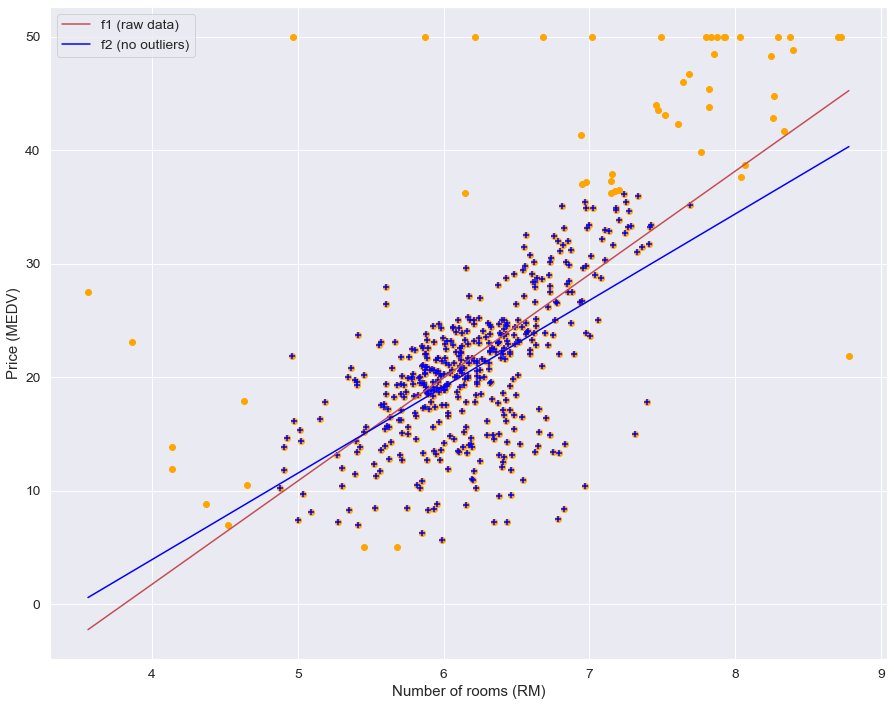

In [48]:

## Demo: multiple solutions
plt.figure(figsize=(15, 12))
plt.scatter(df_raw['RM'], df_raw['target'], marker='o', color='orange')
#plt.title('House price prediction using 1 feature')
plt.xlabel('Number of rooms (RM)')
plt.ylabel('Price (MEDV)')

w_raw = [reg_no_preprocess.intercept_, reg_no_preprocess.coef_[0], ]
w_outlier = [reg_removing_outlier.intercept_, reg_removing_outlier.coef_[0]]

# solution 1 (on raw data)
plt.plot([df_raw['RM'].min(), df_raw['RM'].max()], [w_raw[0] + w_raw[1] * df_raw['RM'].min(), w_raw[0] + w_raw[1] * df_raw['RM'].max()], 'r-', label='f1 (raw data)') # predicted data

#plt.plot([df_preprocessed['RM'].min(), df_preprocessed['RM'].max()], [w_outlier[0] + w_outlier[1] * df_preprocessed['RM'].min(), w_outlier[0] + w_outlier[1] * df_preprocessed['RM'].max()], 'black', label='d2 (no outliers)') # predicted data

plt.plot([df_raw['RM'].min(), df_raw['RM'].max()], [w_outlier[0] + w_outlier[1] * df_raw['RM'].min(), w_outlier[0] + w_outlier[1] * df_raw['RM'].max()], 'blue', label='f2 (no outliers)') # predicted data
plt.scatter(df_preprocessed['RM'], df_preprocessed['target'], marker='+', color='blue')

plt.legend()
plt.show()
